<a href="https://colab.research.google.com/github/kjamison/brainmontageplot/blob/main/brainmontageplot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#may need to restart the runtime and run again after the first time this installs new packages
!pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt



Dataset created in /usr/local/lib/python3.10/dist-packages/brainmontage/nilearn_data/fsaverage



Downloaded 12763136 of 34242788 bytes (37.3%,    1.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /usr/local/lib/python3.10/dist-packages/brainmontage/nilearn_data/fsaverage/735bf0f211246c83396b5f21f706c224/download..... done.


CPU times: user 2.46 s, sys: 616 ms, total: 3.08 s
Wall time: 7.62 s


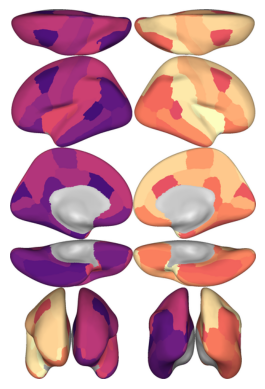

In [3]:
%%time

roivals=np.arange(86)+1 #example values for each ROI (1-numroi)

img=create_montage_figure(roivals,atlasname='fs86', 
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma')

save_image(img,'mydata_montage.png')
#or you can add outputimagefile='mydata_montage.png' to create_montage_figure() to save directly

plt.figure()
plt.imshow(img)
_=plt.axis('off')


Saved mydata_montage_withslices_and_colorbar.png
CPU times: user 6.46 s, sys: 499 ms, total: 6.96 s
Wall time: 10.5 s


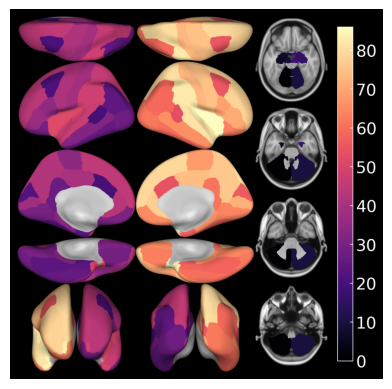

In [10]:
%%time
#create an image with surface views, upscaled to higher dpi (1 instead of 0.25), a vertical row of axial slices, with black background
img_with_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma',
    slice_dict={'axial':[23,33,43,53]},mosaic_dict={'axial':[-1,1]},
    upscale_factor=2, backgroundcolor="black",face_mode='best',
    add_colorbar=True, colorbar_color='white', colorbar_fontsize=20,
    outputimagefile='mydata_montage_withslices_and_colorbar.png')

plt.figure()
plt.imshow(img_with_slices,cmap='magma',vmin=0,vmax=86)
_=plt.axis('off')


Saved mydata_montage_onlyslices.png
CPU times: user 3.38 s, sys: 272 ms, total: 3.66 s
Wall time: 3.58 s


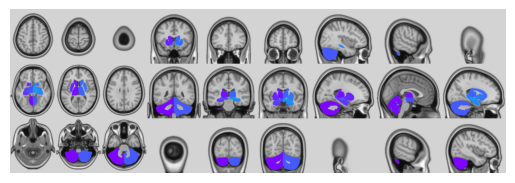

In [11]:
%%time
#Or an image with axial, coronal, and sagittal slices only, and a light gray background
img_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='none',clim=[0,86],colormap='rainbow',
    slice_dict={'axial':range(0,180,20),'coronal':range(20,200,20),'sagittal':range(10,180,20)},
    backgroundcolor="lightgray",
    outputimagefile='mydata_montage_onlyslices.png')

plt.figure()
plt.imshow(img_slices)
_=plt.axis('off')
